In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.visualization import plot_histogram

In [2]:
import random
N = 2
s = random.randint(0, 2**N)
print("As integer:", s)
s = "{}".format(bin(s)[2:])
print("As binary:", s)
# s = '110'

As integer: 3
As binary: 11


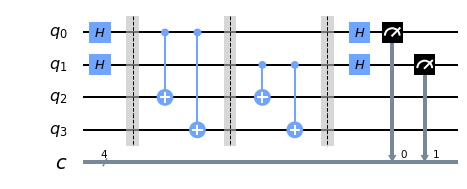

In [3]:
n = 2*len(s)
simonCircuit = QuantumCircuit(n, n)

simonCircuit.h(range(len(s)))
simonCircuit.barrier()

for qbit in range(len(s)):
    if (s[qbit] == '1'):
        for j in range(len(s)):
            simonCircuit.cx(qbit, len(s) + j)
        simonCircuit.barrier()

simonCircuit.h(range(len(s)))

simonCircuit.measure(range(len(s)), range(len(s)))
# simonCircuit.measure_all()

simonCircuit.draw(output='mpl', scale=0.5)

{'00': 509, '11': 515}


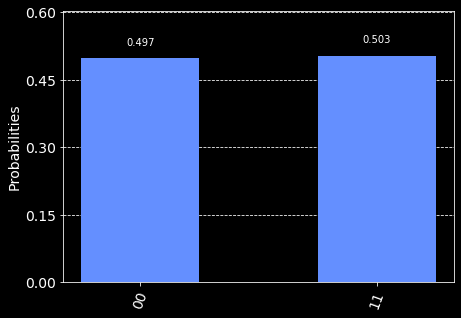

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(simonCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

answer_plot = {}
for measresult in answer.keys():
    measresult_input = measresult[len(str(s)):]
    if measresult_input in answer_plot:
        answer_plot[measresult_input] += answer[measresult]
    else:
        answer_plot[measresult_input] = answer[measresult] 

print( answer_plot )
plot_histogram(answer_plot)